#Assignment 07: Sequence Modeling

This Week's assignment is to train sequence models on the `Emoji Data` to classify the sentences emotion. You'll be creating models that takes in a sentence and predicts the appropriate emoji that describes the sentiment.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 07: Sequence Modeling - Zahraa Dhafer).

**DATASET**
The dataset consists of two csv files, a training file with 16k rows and a testing file with 2k rows, each row has 3 columns, the sentence, the emotion as text (meant to provide description to the emoji and not to be used in training/testing) and the emoji symbol (e.g. 😄, 😡, 😍).<br><br>
**Submission Deadline: Thursday, 3/3/2022 at 3:00 PM**

**Requirements:**
1. Set TensorFlow's random seed to 42.
2. Import all necessary libraries for the sequence modeling project.
3. Download the dataset (the link is provided below).
4. Read data from CSV files and split it into inputs and targets (no need to do train_test_split as the data is already split).
**Note**: Read both Train and Test files
5. Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64.
6. Do the appropriate operations on the targets to prepare them for training.
7. Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively.
8. Use Adam optimizer and the appropriate loss function and metrics to compile the model.
9. Use ModelCheckpoint callback to save the models at the epoch with the best validation accuracy, each model file should have your name (e.g. for Zahraa Dhafer, the model's file name would be "LSTM_Zahraa_D.h5). Make sure to download the model file as it will be a part of your assignment submission. <br>[ModelCheckpoint documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
10. Plot the models metrics.




**HINTS:**
Set the new hyperparameters like vocabulary size, input length (i.e. max sequence length) in a separate cell after the import cell in your notebook (failing to do so will affect your style score)

**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/129V6jlMgzfOWi033t7xIgdn0ZKRvnjP-?usp=sharing)<br>
[Dataset](https://drive.google.com/drive/folders/1i7LmIH7sJHSARAMXgznBqXZ82tzMhYiL?usp=sharing)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSff0OH5akQLPw7LArOYwXwVvJVHtQSgKGnfxlpI8OL-NBUrcg/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Import all necessary libraries for the sequence modeling project

In [63]:
#import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [64]:
vocab_size = 10000
max_sequence = 64
embeddings_dims =100
tf.random.set_seed(42)

# 2- Download the dataset

In [65]:
#download the dataset
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/test.csv')

# 3- Read data from CSV files and split it into inputs and targets 

**Note**: no need to do train_test_split as the data is already split

In [66]:
#show train_data and test_data
print('train_data :', train_data)
print('-'*80)
print('test_data :' ,test_data)

train_data :                                                     text  emotion emoji
0                                i didnt feel humiliated  sadness     😢
1      i can go from feeling so hopeless to so damned...  sadness     😢
2       im grabbing a minute to post i feel greedy wrong    anger     😡
3      i am ever feeling nostalgic about the fireplac...     love     😍
4                                   i am feeling grouchy    anger     😡
...                                                  ...      ...   ...
15995  i just had a very brief time in the beanbag an...  sadness     😢
15996  i am now turning and i feel pathetic that i am...  sadness     😢
15997                     i feel strong and good overall      joy     😄
15998  i feel like this was such a rude comment and i...    anger     😡
15999  i know a lot but i feel so stupid because i ca...  sadness     😢

[16000 rows x 3 columns]
--------------------------------------------------------------------------------
test_data :     

In [67]:
train_data.text[0]

'i didnt feel humiliated'

In [68]:
print(set(train_data.emotion))
print(set(train_data.emoji))

{'surprise', 'sadness', 'fear', 'joy', 'love', 'anger'}
{'😨', '😢', '😡', '😄', '😲', '😍'}


In [69]:
#split dataset to x and y
x_train=train_data.text
y_train=train_data.emotion

x_test=test_data.text
y_test=test_data.emotion

In [70]:
#show the shape
print('x_train:',x_train.shape),print('y_train:',y_train.shape)
print('x_test:',x_test.shape),print('y_test:',y_test.shape)

x_train: (16000,)
y_train: (16000,)
x_test: (2000,)
y_test: (2000,)


(None, None)

#4- Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64

In [71]:
#using tokenizer and padding
tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    oov_token='<OOV>'
)

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [72]:
x_train

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [73]:
#convert texts to unique_numbers
tokenizer.word_index

{'<OOV>': 1,
 'i': 2,
 'feel': 3,
 'and': 4,
 'to': 5,
 'the': 6,
 'a': 7,
 'feeling': 8,
 'that': 9,
 'of': 10,
 'my': 11,
 'in': 12,
 'it': 13,
 'like': 14,
 'so': 15,
 'im': 16,
 'for': 17,
 'me': 18,
 'have': 19,
 'but': 20,
 'was': 21,
 'is': 22,
 'this': 23,
 'am': 24,
 'with': 25,
 'not': 26,
 'about': 27,
 'be': 28,
 'as': 29,
 'on': 30,
 'you': 31,
 'just': 32,
 'at': 33,
 'when': 34,
 'or': 35,
 'all': 36,
 'because': 37,
 'more': 38,
 'do': 39,
 'can': 40,
 'really': 41,
 'up': 42,
 't': 43,
 'by': 44,
 'are': 45,
 'very': 46,
 'been': 47,
 'know': 48,
 'if': 49,
 'out': 50,
 'myself': 51,
 'time': 52,
 'what': 53,
 'how': 54,
 'get': 55,
 'little': 56,
 'had': 57,
 'now': 58,
 'will': 59,
 'from': 60,
 'they': 61,
 'being': 62,
 'people': 63,
 'he': 64,
 'them': 65,
 'would': 66,
 'want': 67,
 'her': 68,
 'some': 69,
 'one': 70,
 'still': 71,
 'think': 72,
 'ive': 73,
 'who': 74,
 'even': 75,
 'him': 76,
 'an': 77,
 'life': 78,
 'its': 79,
 'there': 80,
 'make': 81,
 'bit':

In [74]:
x_train_tokenized=tokenizer.texts_to_sequences(x_train)
x_test_tokenized=tokenizer.texts_to_sequences(x_test)

In [75]:
print(x_train[0])
print(x_train_tokenized[0])

i didnt feel humiliated
[2, 139, 3, 643]


In [76]:
print(x_test[0])
print(x_test_tokenized[0])

im feeling rather rotten so im not very ambitious right now
[16, 8, 207, 690, 15, 16, 26, 46, 4686, 113, 58]


In [77]:
print("Length of Review 1:", len(x_train_tokenized[1]))
print("Length of Review 2:", len(x_train_tokenized[2]))
print("Length of Review 3:", len(x_train_tokenized[3]))

Length of Review 1: 21
Length of Review 2: 10
Length of Review 3: 18


300


(array([1833., 3659., 3524., 2709., 1813., 1043.,  701.,  376.,  219.,
         123.]),
 array([  7. ,  36.3,  65.6,  94.9, 124.2, 153.5, 182.8, 212.1, 241.4,
        270.7, 300. ]),
 <a list of 10 Patch objects>)

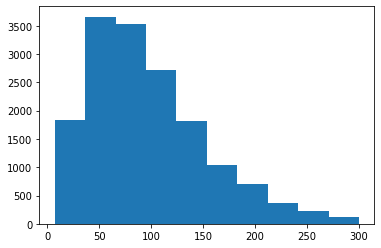

In [78]:
list_seq=[]
seq_lenght=[len(list_seq) for list_seq in x_train]
print(max(seq_lenght))
plt.hist(seq_lenght)

In [79]:
x_train_padding=tf.keras.preprocessing.sequence.pad_sequences(
    x_train_tokenized,
    maxlen=max_sequence, 
    padding='post' 
)

In [80]:
x_test_padding=tf.keras.preprocessing.sequence.pad_sequences(
    x_test_tokenized,
    maxlen=max_sequence, 
    padding='post' 
)

In [81]:
print("Length of Review 1:", len(x_train_padding[1]))
print("Length of Review 2:", len(x_train_padding[2]))
print("Length of Review 3:", len(x_train_padding[3]))

Length of Review 1: 64
Length of Review 2: 64
Length of Review 3: 64


In [82]:
print("Length of Review 1:", len(x_test_padding[1]))
print("Length of Review 2:", len(x_test_padding[2]))
print("Length of Review 3:", len(x_test_padding[3]))

Length of Review 1: 64
Length of Review 2: 64
Length of Review 3: 64


#5- Do the appropriate operations on the targets to prepare them for training

In [83]:
#preprocess Targets
y_train.replace({'sadness':0, 'joy':1, 'fear':2, 'surprise':3, 'love':4, 'anger':5},inplace=True)
y_test.replace({'sadness':0, 'joy':1, 'fear':2, 'surprise':3, 'love':4, 'anger':5},inplace=True)

In [84]:
print(y_train),print(y_test)

0        0
1        0
2        5
3        4
4        5
        ..
15995    0
15996    0
15997    1
15998    5
15999    0
Name: emotion, Length: 16000, dtype: int64
0       0
1       0
2       0
3       1
4       0
       ..
1995    5
1996    5
1997    1
1998    1
1999    2
Name: emotion, Length: 2000, dtype: int64


(None, None)

In [85]:
# encode the training and testing target into one hot vector
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

In [86]:
y_train_hot

<tf.Tensor: shape=(16000, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [87]:
y_test_hot

<tf.Tensor: shape=(2000, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [88]:
def create_pipline(x,y):
  data=tf.data.Dataset.from_tensor_slices((x,y))
  data=data.shuffle(1028)
  data=data.batch(32)
  data=data.prefetch(tf.data.experimental.AUTOTUNE)
  return data

train_dataset=create_pipline(x_train_padding,y_train_hot) 
test_dataset=create_pipline(x_test_padding,y_test_hot)

#6- Modeling:
Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively

##RNN Model

In [99]:
#create a rnn_model
model_rnn = tf.keras.Sequential([
      tf.keras.layers.Input([max_sequence]), 
      tf.keras.layers.Embedding(vocab_size+1,64,mask_zero=True),
      tf.keras.layers.SimpleRNN(units=32),
      tf.keras.layers.Dense(units=6,activation='softmax'),
])

model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 64, 64)            640064    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 643,366
Trainable params: 643,366
Non-trainable params: 0
_________________________________________________________________


In [100]:
#saved the model to the folder
save_model=tf.keras.callbacks.ModelCheckpoint('/content/model_1',save_best_only=True,
                                              monitor='loss')
model_rnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
#training the model
model_1=model_rnn.fit(train_dataset, epochs=5
              , validation_data=test_dataset,callbacks=[save_model])

Epoch 1/5
500/500 [==============================] - 71s 139ms/step - loss: 1.4920 - accuracy: 0.4121 - val_loss: 1.0990 - val_accuracy: 0.6310
Epoch 2/5
500/500 [==============================] - 68s 136ms/step - loss: 0.7004 - accuracy: 0.7678 - val_loss: 0.6182 - val_accuracy: 0.7985
Epoch 3/5
500/500 [==============================] - 68s 136ms/step - loss: 0.3643 - accuracy: 0.8842 - val_loss: 0.5219 - val_accuracy: 0.8400
Epoch 4/5
500/500 [==============================] - 68s 136ms/step - loss: 0.2302 - accuracy: 0.9279 - val_loss: 0.5548 - val_accuracy: 0.8270
Epoch 5/5
500/500 [==============================] - 67s 135ms/step - loss: 0.1675 - accuracy: 0.9471 - val_loss: 0.4861 - val_accuracy: 0.8480


###testing and plot

In [140]:
from sklearn import metrics
from tensorflow.python.eager.monitoring import Metric
pre=np.argmax(model_rnn(x_test_padding),-1)
micro='micro'
print(f'acurracy:{metrics.accuracy_score(np.argmax(y_test_hot,-1),pre)}')
print(f'precision:{metrics.precision_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'recall:{metrics.recall_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'f1_score:{metrics.f1_score(np.argmax(y_test_hot,-1),pre,average=micro)}')

acurracy:0.848
precision:0.848
recall:0.848
f1_score:0.848


In [150]:
#evalution
loss, accuracy = model_rnn.evaluate(test_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 0s 25ms/step - loss: 0.5692 - accuracy: 0.8229
Loss : 0.5691856741905212
Accuracy : 0.8229166865348816


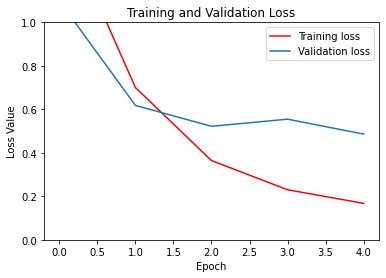

In [113]:
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']

plt.figure()
plt.plot(model_1.epoch, loss, 'r', label='Training loss')
plt.plot(model_1.epoch, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

##LSTM Model

In [114]:
model_lstm = tf.keras.Sequential([
      tf.keras.layers.Input([max_sequence]), 
      tf.keras.layers.Embedding(vocab_size+1, 64, mask_zero=True),
      tf.keras.layers.LSTM(128),
      tf.keras.layers.Dense(units=6,activation='softmax'),                             
])

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 64)            640064    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 739,654
Trainable params: 739,654
Non-trainable params: 0
_________________________________________________________________


In [116]:
save_model_2=tf.keras.callbacks.ModelCheckpoint('/content/model_2',save_best_only=True,
                                              monitor='loss')
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
model_2=model_lstm.fit(train_dataset, epochs=3, validation_data=test_dataset,callbacks=[save_model_2])


Epoch 1/3
499/500 [============================>.] - ETA: 0s - loss: 1.1238 - accuracy: 0.5704

INFO:tensorflow:Assets written to: /content/model_2/assets


INFO:tensorflow:Assets written to: /content/model_2/assets


500/500 [==============================] - 32s 48ms/step - loss: 1.1234 - accuracy: 0.5707 - val_loss: 0.5073 - val_accuracy: 0.8400
Epoch 2/3
500/500 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.9004

INFO:tensorflow:Assets written to: /content/model_2/assets


INFO:tensorflow:Assets written to: /content/model_2/assets


500/500 [==============================] - 23s 46ms/step - loss: 0.3055 - accuracy: 0.9004 - val_loss: 0.2805 - val_accuracy: 0.9000
Epoch 3/3
500/500 [==============================] - ETA: 0s - loss: 0.1468 - accuracy: 0.9486

INFO:tensorflow:Assets written to: /content/model_2/assets


INFO:tensorflow:Assets written to: /content/model_2/assets


500/500 [==============================] - 24s 48ms/step - loss: 0.1468 - accuracy: 0.9486 - val_loss: 0.2335 - val_accuracy: 0.9205


###testing


In [119]:
pre=np.argmax(model_lstm(x_test_padding),-1)
micro='micro'
print(f'acurracy:{metrics.accuracy_score(np.argmax(y_test_hot,-1),pre)}')
print(f'precision:{metrics.precision_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'recall:{metrics.recall_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'f1_score:{metrics.f1_score(np.argmax(y_test_hot,-1),pre,average=micro)}')

acurracy:0.9205
precision:0.9205
recall:0.9205
f1_score:0.9205


In [151]:
#evalution
loss, accuracy = model_lstm.evaluate(test_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 0s 11ms/step - loss: 0.2347 - accuracy: 0.9236
Loss : 0.23466525971889496
Accuracy : 0.9236111044883728


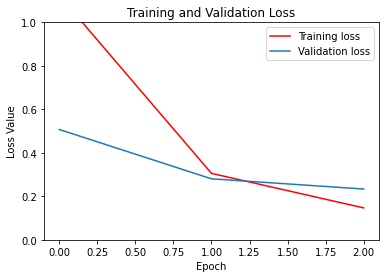

In [121]:
loss = model_2.history['loss']
val_loss = model_2.history['val_loss']

plt.figure()
plt.plot(model_2.epoch, loss, 'r', label='Training loss')
plt.plot(model_2.epoch, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

##GRU Model


In [126]:
model_gru = tf.keras.Sequential([
      tf.keras.layers.Input([max_sequence]), 
      tf.keras.layers.Embedding(vocab_size+1, 64, mask_zero=True), 
      tf.keras.layers.GRU(128,return_sequences=True),
      tf.keras.layers.GRU(128),
      tf.keras.layers.Dense(units=6,activation='softmax'),                             
])

model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 64, 64)            640064    
                                                                 
 gru_1 (GRU)                 (None, 64, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 814,406
Trainable params: 814,406
Non-trainable params: 0
_________________________________________________________________


In [127]:
save_model_3=tf.keras.callbacks.ModelCheckpoint('/content/mode_3',save_best_only=True,
                                              monitor='loss')
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [128]:
model_3=model_gru.fit(train_dataset, epochs=3, validation_data=test_dataset,callbacks=[save_model_3])

Epoch 1/3
499/500 [============================>.] - ETA: 0s - loss: 0.8628 - accuracy: 0.6774

INFO:tensorflow:Assets written to: /content/mode_3/assets


INFO:tensorflow:Assets written to: /content/mode_3/assets


500/500 [==============================] - 70s 121ms/step - loss: 0.8613 - accuracy: 0.6779 - val_loss: 0.2588 - val_accuracy: 0.9050
Epoch 2/3
499/500 [============================>.] - ETA: 0s - loss: 0.1610 - accuracy: 0.9336

INFO:tensorflow:Assets written to: /content/mode_3/assets


INFO:tensorflow:Assets written to: /content/mode_3/assets


500/500 [==============================] - 40s 80ms/step - loss: 0.1609 - accuracy: 0.9336 - val_loss: 0.1851 - val_accuracy: 0.9250
Epoch 3/3
499/500 [============================>.] - ETA: 0s - loss: 0.1021 - accuracy: 0.9543

INFO:tensorflow:Assets written to: /content/mode_3/assets


INFO:tensorflow:Assets written to: /content/mode_3/assets


500/500 [==============================] - 40s 79ms/step - loss: 0.1023 - accuracy: 0.9542 - val_loss: 0.2228 - val_accuracy: 0.9160


In [152]:
#evalution
loss, accuracy = model_gru.evaluate(test_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 0s 16ms/step - loss: 0.2078 - accuracy: 0.9201
Loss : 0.20778049528598785
Accuracy : 0.9201388955116272


In [153]:
pre=np.argmax(model_gru(x_test_padding),-1)
micro='micro'
print(f'acurracy:{metrics.accuracy_score(np.argmax(y_test_hot,-1),pre)}')
print(f'precision:{metrics.precision_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'recall:{metrics.recall_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'f1_score:{metrics.f1_score(np.argmax(y_test_hot,-1),pre,average=micro)}')

acurracy:0.916
precision:0.916
recall:0.916
f1_score:0.916


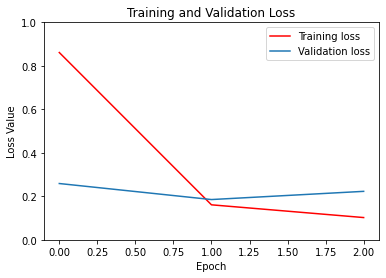

In [130]:
loss = model_3.history['loss']
val_loss = model_3.history['val_loss']

plt.figure()
plt.plot(model_3.epoch, loss, 'r', label='Training loss')
plt.plot(model_3.epoch, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

##DNN with Embedding Layers

In [137]:
model_dnn_with_embeddings = tf.keras.Sequential([
      tf.keras.layers.Input([max_sequence]), 
      tf.keras.layers.Embedding(vocab_size+1, 64, mask_zero=True), 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(units=6,activation='softmax'),
])

model_dnn_with_embeddings.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 64)            640064    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               524416    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 6)                 774       
                                                                 
Total params: 1,165,254
Trainable params: 1,165,254
Non-trainable params: 0
_________________________________________________________________


In [138]:
save_model_4=tf.keras.callbacks.ModelCheckpoint('/content/model_4',save_best_only=True,
                                              monitor='loss')
model_dnn_with_embeddings.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
model_4=model_dnn_with_embeddings.fit(train_dataset, epochs=5, validation_data=test_dataset,callbacks=[save_model_4])

Epoch 1/5
495/500 [============================>.] - ETA: 0s - loss: 1.2920 - accuracy: 0.5105INFO:tensorflow:Assets written to: /content/model_4/assets


INFO:tensorflow:Assets written to: /content/model_4/assets


500/500 [==============================] - 5s 8ms/step - loss: 1.2862 - accuracy: 0.5133 - val_loss: 0.7065 - val_accuracy: 0.7875
Epoch 2/5
496/500 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.8777INFO:tensorflow:Assets written to: /content/model_4/assets


INFO:tensorflow:Assets written to: /content/model_4/assets


500/500 [==============================] - 4s 7ms/step - loss: 0.3703 - accuracy: 0.8781 - val_loss: 0.4316 - val_accuracy: 0.8585
Epoch 3/5
495/500 [============================>.] - ETA: 0s - loss: 0.1033 - accuracy: 0.9695INFO:tensorflow:Assets written to: /content/model_4/assets


INFO:tensorflow:Assets written to: /content/model_4/assets


500/500 [==============================] - 4s 8ms/step - loss: 0.1027 - accuracy: 0.9697 - val_loss: 0.4654 - val_accuracy: 0.8585
Epoch 4/5
493/500 [============================>.] - ETA: 0s - loss: 0.0460 - accuracy: 0.9883INFO:tensorflow:Assets written to: /content/model_4/assets


INFO:tensorflow:Assets written to: /content/model_4/assets


500/500 [==============================] - 4s 8ms/step - loss: 0.0461 - accuracy: 0.9883 - val_loss: 0.5137 - val_accuracy: 0.8530
Epoch 5/5
492/500 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9914INFO:tensorflow:Assets written to: /content/model_4/assets


INFO:tensorflow:Assets written to: /content/model_4/assets


500/500 [==============================] - 4s 8ms/step - loss: 0.0333 - accuracy: 0.9914 - val_loss: 0.5291 - val_accuracy: 0.8525


###testing


In [141]:
pre=np.argmax(model_dnn_with_embeddings(x_test_padding),-1)
micro='micro'
print(f'acurracy:{metrics.accuracy_score(np.argmax(y_test_hot,-1),pre)}')
print(f'precision:{metrics.precision_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'recall:{metrics.recall_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'f1_score:{metrics.f1_score(np.argmax(y_test_hot,-1),pre,average=micro)}')

acurracy:0.8525
precision:0.8525
recall:0.8525
f1_score:0.8525


In [154]:
#evalution
loss, accuracy = model_dnn_with_embeddings.evaluate(test_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.8542
Loss : 0.6020017266273499
Accuracy : 0.8541666865348816


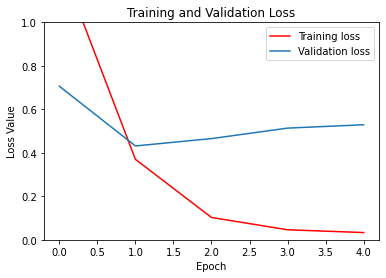

In [143]:
loss = model_4.history['loss']
val_loss = model_4.history['val_loss']

plt.figure()
plt.plot(model_4.epoch, loss, 'r', label='Training loss')
plt.plot(model_4.epoch, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

##Bidirectional LSTM Model

In [144]:
model__bidir_gru = tf.keras.Sequential([
      tf.keras.layers.Input([max_sequence]), 
      tf.keras.layers.Embedding(vocab_size+1, 64, mask_zero=True), 
      tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=64, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
      tf.keras.layers.Dense(units=6,activation='softmax'),                             
])

model__bidir_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 64, 64)            640064    
                                                                 
 bidirectional (Bidirectiona  (None, 64, 128)          49920     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              198144    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 889,670
Trainable params: 889,670
Non-trainable params: 0
_________________________________________________________________


In [145]:
save_model_5=tf.keras.callbacks.ModelCheckpoint('/content/model_5',save_best_only=True,
                                              monitor='loss')
model__bidir_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [146]:
model_5=model__bidir_gru.fit(train_dataset, epochs=3, validation_data=test_dataset,callbacks=[save_model_5])

Epoch 1/3
500/500 [==============================] - ETA: 0s - loss: 0.8588 - accuracy: 0.6761

INFO:tensorflow:Assets written to: /content/model_5/assets


INFO:tensorflow:Assets written to: /content/model_5/assets


500/500 [==============================] - 141s 235ms/step - loss: 0.8588 - accuracy: 0.6761 - val_loss: 0.2660 - val_accuracy: 0.8995
Epoch 2/3
500/500 [==============================] - ETA: 0s - loss: 0.1703 - accuracy: 0.9326

INFO:tensorflow:Assets written to: /content/model_5/assets


INFO:tensorflow:Assets written to: /content/model_5/assets


500/500 [==============================] - 86s 173ms/step - loss: 0.1703 - accuracy: 0.9326 - val_loss: 0.1821 - val_accuracy: 0.9190
Epoch 3/3
500/500 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9595

INFO:tensorflow:Assets written to: /content/model_5/assets


INFO:tensorflow:Assets written to: /content/model_5/assets


500/500 [==============================] - 107s 213ms/step - loss: 0.0991 - accuracy: 0.9595 - val_loss: 0.1815 - val_accuracy: 0.9245


###testing


In [147]:
pre=np.argmax(model__bidir_gru(x_test_padding),-1)
micro='micro'
print(f'acurracy:{metrics.accuracy_score(np.argmax(y_test_hot,-1),pre)}')
print(f'precision:{metrics.precision_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'recall:{metrics.recall_score(np.argmax(y_test_hot,-1),pre,average=micro)}')
print(f'f1_score:{metrics.f1_score(np.argmax(y_test_hot,-1),pre,average=micro)}')

acurracy:0.9245
precision:0.9245
recall:0.9245
f1_score:0.9245


In [148]:
#evalution
loss, accuracy = model__bidir_gru.evaluate(test_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 0s 21ms/step - loss: 0.1928 - accuracy: 0.9201
Loss : 0.19282744824886322
Accuracy : 0.9201388955116272


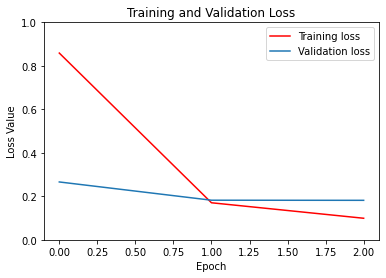

In [149]:
loss = model_5.history['loss']
val_loss = model_5.history['val_loss']

plt.figure()
plt.plot(model_5.epoch, loss, 'r', label='Training loss')
plt.plot(model_5.epoch, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

#The best model is Bidirectional LSTM 

In [166]:
#prediction

def predict(text):
  
  tokenized_texts = tokenizer.texts_to_sequences([text])
  input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_texts, maxlen=max_sequence, padding='post')

  output = model__bidir_gru.predict(input)[0]
  output=tf.argmax(output)

  print("The Sentence: ", output)

 







In [170]:
text = "I am sad"  #@param {type: "string"}

predict(text)

The Sentence:  tf.Tensor(0, shape=(), dtype=int64)
